Stars Type predicyion

Type :

Naine rouge - 0
Naine brune - 1
Naine Blanche - 2
Séquence principale - 3
Super Géants - 4
Hyper géants - 5

In [81]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn import metrics



loading data

In [116]:
star = pd.read_csv('Stars.csv', sep=',')
star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


DATA PRE-processing

In [3]:
star.isnull().sum()
star.describe()
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
star

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [6]:
encoder = LabelEncoder()


star['Color'] = encoder.fit_transform(star['Color'])
star['Spectral_Class'] = encoder.fit_transform(star['Spectral_Class'])


In [7]:
star

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,9,0,5
238,9235,404940.000000,1112.0000,-11.23,9,0,5


VISUALIZATION

<AxesSubplot:title={'center':'histogramme des Color'}, xlabel='COLOR', ylabel='Frequency'>

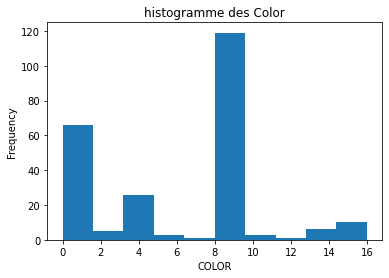

In [8]:
plt.title("histogramme des Color")
plt.xlabel("COLOR")
star["Color"].plot.hist()

<AxesSubplot:title={'center':'histogramme du Spectral_Class'}, xlabel='Spectral_Class', ylabel='Frequency'>

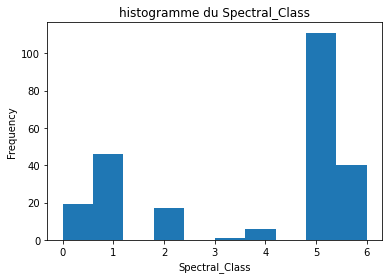

In [9]:
plt.title("histogramme du Spectral_Class")
plt.xlabel("Spectral_Class")
star["Spectral_Class"].plot.hist()

<AxesSubplot:title={'center':'histogramme de la Magnitude absolue'}, xlabel='Magnitude absolue', ylabel='Frequency'>

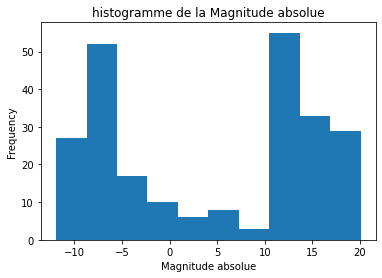

In [10]:
plt.title("histogramme de la Magnitude absolue")
plt.xlabel("Magnitude absolue")
star["A_M"].plot.hist()

<AxesSubplot:title={'center':'histogramme du Rayon relatif'}, xlabel='Rayon relatif', ylabel='Frequency'>

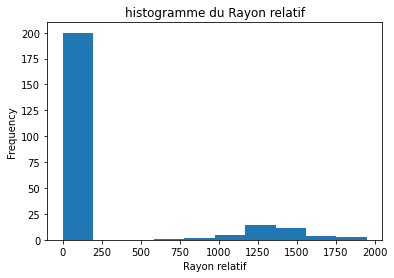

In [11]:
plt.title("histogramme du Rayon relatif")
plt.xlabel("Rayon relatif")
star["R"].plot.hist()

<AxesSubplot:title={'center':'histogramme de la Luminosité relative'}, xlabel='Luminosité relative', ylabel='Frequency'>

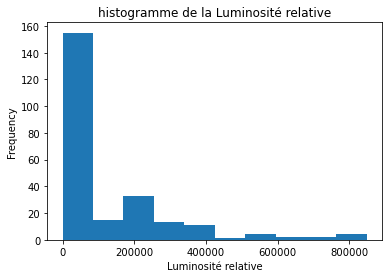

In [12]:
plt.title("histogramme de la Luminosité relative")
plt.xlabel("Luminosité relative")
star["L"].plot.hist()

<AxesSubplot:title={'center':'histogramme de la Température (K)'}, xlabel='Température (K)', ylabel='Frequency'>

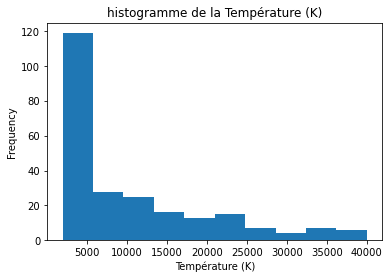

In [13]:
plt.title("histogramme de la Température (K)")
plt.xlabel("Température (K)")
star["Temperature"].plot.hist()

CORRELATIONS

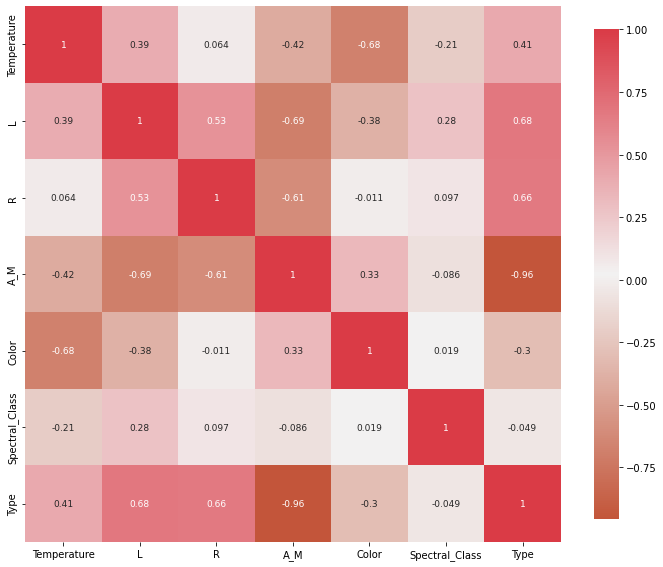

In [14]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 20 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        ) 
    
plot_correlation_map(star)  

FEATURES SELECTION:
Temperature, L, R	



MODELING:
    
MODEL: polynomial regression

In [117]:

X=pd.DataFrame(np.c_[star['Temperature'],star['L'],star['R']]).values
Y=star['Type'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=30) 


model=LinearRegression()
poly=PolynomialFeatures(degree=3)

X_train_p = poly.fit_transform(X_train) 
model.fit(X_train_p, Y_train)
X_test_p = poly.fit_transform(X_test)
y_predicted = model.predict(X_test_p)

print("MSE: ", metrics.mean_squared_error(Y_test, y_predicted))
print("R squared: ", metrics.r2_score(Y_test,y_predicted))

MSE:  0.390188144445622
R squared:  0.860521427265398
